<a href="https://colab.research.google.com/github/JFernandees/Data_science/blob/main/Case_Elo_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados para a expansão estratégica de uma rede de laboratórios**

O mercado de medicina diagnóstica é um segmento em constante crescimento da indústria de saúde, que oferece serviços de diagnóstico e testes para pacientes e médicos. Esses serviços incluem uma ampla gama de exames de laboratório, testes de imagem, testes genéticos e testes de diagnóstico in vitro, que ajudam a identificar e diagnosticar doenças em pacientes. 

<center><img alt="Colaboratory logo" width="50%" src="https://img.freepik.com/vetores-gratis/medicos-e-analises-prescritivas-personalizadas_335657-1882.jpg?w=996&t=st=1679600253~exp=1679600853~hmac=d153092c815ffbe8596dd2bac6ff070dd25f94ceda3c4dc65e6eba42c18820ae"></center>

Com o avanço das tecnologias de diagnóstico e a crescente conscientização sobre saúde, o mercado de medicina diagnóstica tem experimentado um crescimento significativo nos últimos anos. Essa indústria desempenha um papel crítico no diagnóstico e tratamento de doenças em pacientes, permitindo que os médicos identifiquem e diagnostiquem doenças com maior precisão e eficácia, o que ajuda a melhorar a qualidade dos cuidados de saúde e a reduzir os custos associados ao tratamento. Este mercado é composto por uma variedade de empresas, incluindo grandes corporações globais e empresas locais menores que oferecem serviços personalizados. Este setor é fundamental para o avanço da saúde global e continuará a crescer e evoluir à medida que novas tecnologias de diagnóstico forem desenvolvidas e as demandas de pacientes e profissionais de saúde mudarem.

## **Importação dos pacotes e obtenção dos dados**
Inicialmente irei importa as blibiotecas que serão usadas neste projeto e em seguida importarei os dados.

In [1]:
#Bibliotecas importadas

# Manipulação de dados 
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline 


In [2]:
# importação dos datasets para seus respectivos DataFrames
df_demo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /DemographicData_ZCTAs.csv', index_col=0)
df_eco = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /EconomicData_ZCTAs.csv', index_col=0)
df_geocod = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /df_geocode.csv', index_col=0)
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /test_data.csv')
df_tran = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /transactional_data.csv', sep=';')

# **Análise Exploratória dos Dados**

Inicialmente a análise exploratória será realizada em duas etapas:
*  Limpeza e tratamentos dos dados.
*  Análise dos dados com objetivo de identificar os três melhores códigos postais para a instalação de novos laboratórios.


## **Limpeza e tratamento dos dados**

Durante esta etapa, serão realizadas análises detalhadas a respeito da qualidade dos dados utilizados, com o intuito de garantir a integridade e confiabilidade das informações. Serão executados procedimentos que visam a remoção de informações duplicadas, correção de possíveis erros e inconsistências, identificação de valores faltantes ou inválidos e análise de possíveis outliers, que podem interferir na análise dos resultados.

In [3]:
# Inicialmente irei verificar o tamanho do dataframe 
print(f"Quantidade de linhas: {df_demo.shape[0]}")
print(f"Quantidade de colunas: {df_demo.shape[1]}\n")
print('-'*50)

# Em seguida irei verificar o tipo dos dados
display(df_demo.dtypes)
print('-'*50)

# Por fim, darei uma olhada nas primeiras entradas do dataframe para ter uma ideia de como está os dados
df_demo.head()

# Realizarei o mesmo processo para o outros 4 dataframes

Quantidade de linhas: 33120
Quantidade de colunas: 18

--------------------------------------------------


Id                                  object
GeographicAreaName                  object
TotalPopulation                      int64
SexRatio(males per 100 females)    float64
Population_Under5Years               int64
Population_5to9Years                 int64
Population_10to14Years               int64
Population_15to19Years               int64
Population_20to24Years               int64
Population_25to34Years               int64
Population_35to44Years               int64
Population_45to54Years               int64
Population_55to59Years               int64
Population_60to64Years               int64
Population_65to74Years               int64
Population_75to84Years               int64
Population_85YearsAndOver            int64
MedianAgeInYears                   float64
dtype: object

--------------------------------------------------


,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


In [4]:
# Tamanho do dataframe
print(f'Quantidade de linhas: {df_eco.shape[0]}')
print(f"Quantidade de colunas: {df_eco.shape[1]}\n")
print('-'*50)

# Tipo dos dados
display(df_eco.dtypes)
print('-'*50)

# Primeiras entradas do dataframe
df_eco.head()

Quantidade de linhas: 629280
Quantidade de colunas: 12

--------------------------------------------------


id                                    object
Geographic Area Name                  object
TotalHouseholds_LessThan$10.000        int64
TotalHouseholds_$10.000to$14.999       int64
TotalHouseholds_$15.000to$24.999       int64
TotalHouseholds_$25.000to$34.999       int64
TotalHouseholds_$35.000to$49.999       int64
TotalHouseholds_$50.000to$74.999       int64
TotalHouseholds_$75.000to$99.999       int64
TotalHouseholds_$100.000to$149.999     int64
TotalHouseholds_$150.000to$199.999     int64
TotalHouseholds_$200.000OrMore         int64
dtype: object

--------------------------------------------------


,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [5]:
# Tamanho do dataframe
print(f'Quantidade de linhas: {df_geocod.shape[0]}')
print(f"Quantidade de colunas: {df_geocod.shape[1]}\n")
print('-'*40)

# Tipo dos dados
display(df_geocod.dtypes)
print('-'*40)

# Primeiras entradas do dataframe
df_geocod.head()

Quantidade de linhas: 119
Quantidade de colunas: 4

----------------------------------------


Lab Id       object
Address      object
Location     object
Zipcode     float64
dtype: object

----------------------------------------


,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


In [6]:
# Tamanho do dataframe
print(f'Quantidade de linhas: {df_test.shape[0]}')
print(f"Quantidade de colunas: {df_test.shape[1]}\n")
print('-'*40)

# Tipo dos dados
display(df_test.dtypes)
print('-'*40)

# Primeiras entradas do dataframe
df_test.head()

Quantidade de linhas: 2002
Quantidade de colunas: 6

----------------------------------------


CodItem           int64
Desc Item        object
Category         object
Family           object
Speciality       object
Testing Cost    float64
dtype: object

----------------------------------------


,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [7]:
# Tamanho do dataframe
print(f'Quantidade de linhas: {df_tran.shape[0]}')
print(f"Quantidade de colunas: {df_tran.shape[1]}\n")
print('-'*40)

# Tipo dos dados
display(df_tran.dtypes)
print('-'*40)

# Primeiras entradas do dataframe
df_tran.head()

Quantidade de linhas: 2355241
Quantidade de colunas: 8

----------------------------------------


Patient Id         object
Gender             object
Date of birth      object
Date of service    object
Service Id         object
Lab Id             object
CodItem             int64
Testing Cost       object
dtype: object

----------------------------------------


,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


Com base na visão geral dos dados e dos dataframes, foi possível compreender de forma mais clara como as informações estão distribuídas em cada coluna. Além disso, constatou-se que alguns dados apresentam formatos incorretos, o que pode comprometer as análises posteriores.

Antes de realizar a conversão dos tipos de dados, será necessário analisar a presença de valores ausentes em cada dataframe, uma vez que isso pode afetar a forma como os dados serão tratados. A identificação e o tratamento adequado desses valores faltantes são fundamentais para garantir a integridade e a confiabilidade dos resultados obtidos. Dessa forma, essa análise preliminar se faz necessária para minimizar possíveis impactos na conversão dos tipos de dados e na qualidade geral das análises realizadas.

### **Analíse dos Valores ausentes**

Para dar início à etapa de análise de dados ausentes, será calculada a porcentagem de valores faltantes em cada dataframe. Essa análise é fundamental para entender a magnitude e a distribuição desses valores ausentes e, assim, determinar a melhor estratégia de tratamento a ser adotada.

MedianAgeInYears                   1.717995
SexRatio(males per 100 females)    1.509662
Population_35to44Years             0.000000
Population_85YearsAndOver          0.000000
Population_75to84Years             0.000000
Population_65to74Years             0.000000
Population_60to64Years             0.000000
Population_55to59Years             0.000000
Population_45to54Years             0.000000
Id                                 0.000000
GeographicAreaName                 0.000000
Population_20to24Years             0.000000
Population_15to19Years             0.000000
Population_10to14Years             0.000000
Population_5to9Years               0.000000
Population_Under5Years             0.000000
TotalPopulation                    0.000000
Population_25to34Years             0.000000
dtype: float64

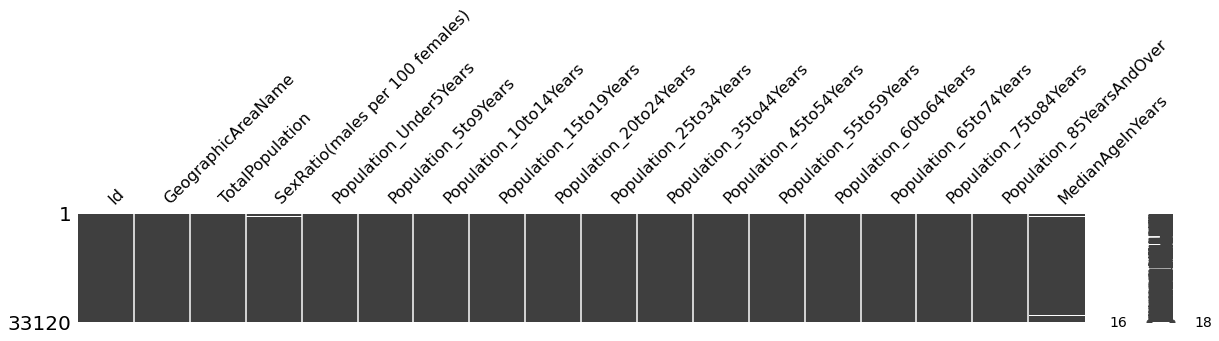

In [8]:
# Irei plotar um grafico para mostrar se existe valores ausentes e como eles estão destribuidos ao longo do dataframe 
msno.matrix(df_demo, figsize = (20,2));

# Calculo da porcentagem de valores ausentes 
(df_demo.isnull().sum() / df_demo.shape[0] * 100).sort_values(ascending=False)

# Realizarei o mesmo processo para o outros 4 dataframes

id                                    0.0
Geographic Area Name                  0.0
TotalHouseholds_LessThan$10.000       0.0
TotalHouseholds_$10.000to$14.999      0.0
TotalHouseholds_$15.000to$24.999      0.0
TotalHouseholds_$25.000to$34.999      0.0
TotalHouseholds_$35.000to$49.999      0.0
TotalHouseholds_$50.000to$74.999      0.0
TotalHouseholds_$75.000to$99.999      0.0
TotalHouseholds_$100.000to$149.999    0.0
TotalHouseholds_$150.000to$199.999    0.0
TotalHouseholds_$200.000OrMore        0.0
dtype: float64

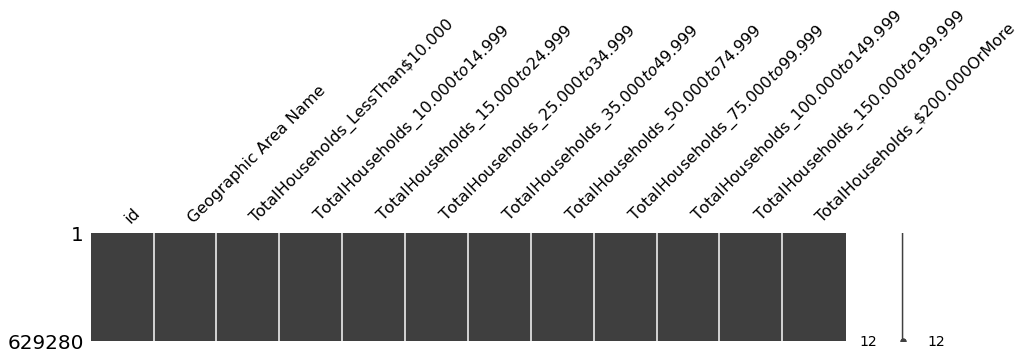

In [9]:
# Grafico de valores ausentes
msno.matrix(df_eco, figsize = (15,2));

# Calculo da porcentagem de valores ausentes 
(df_eco.isnull().sum() / df_eco.shape[0] * 100).sort_values(ascending=False)

Zipcode     0.840336
Lab Id      0.000000
Address     0.000000
Location    0.000000
dtype: float64

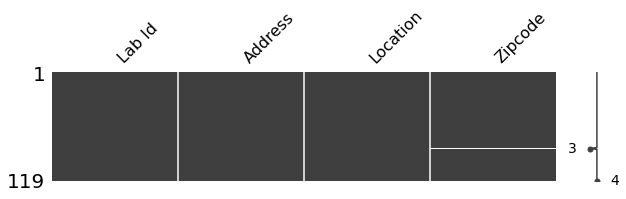

In [10]:
# Grafico de valores ausentes
msno.matrix(df_geocod, figsize = (10,2));

# Calculo da porcentagem de valores ausentes 
(df_geocod.isnull().sum() / df_geocod.shape[0] * 100).sort_values(ascending=False)

CodItem         0.0
Desc Item       0.0
Category        0.0
Family          0.0
Speciality      0.0
Testing Cost    0.0
dtype: float64

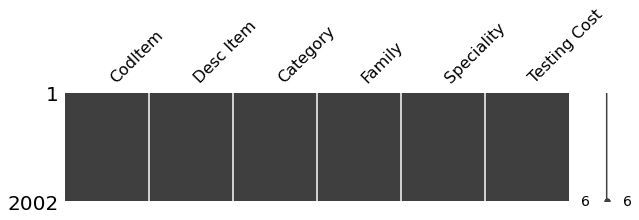

In [11]:
# Grafico de valores ausentes
msno.matrix(df_test, figsize = (10,2));

# Calculo da porcentagem de valores ausentes 
(df_test.isnull().sum() / df_test.shape[0] * 100).sort_values(ascending=False)

In [ ]:
# Grafico de valores ausentes
msno.matrix(df_tran, figsize = (12,2));

# Calculo da porcentagem de valores ausentes 
(df_tran.isnull().sum() / df_tran.shape[0] * 100).sort_values(ascending=False)

#### **Tratando os dados ausentes**

Foi possível observar a presença de valores ausentes em três dos cinco dataframes analisados, onde:

*  No dataframe `df_demo`, foram identificadas duas colunas com valores ausentes, que representam no máximo `1,7%` do dataframe cada. Para tratar esses valores faltantes, optou-se por substituí-los pelas respectivas medianas das colunas. Essa estratégia é comumente utilizada para tratar valores ausentes em variáveis numéricas, uma vez que preserva as características centrais da distribuição dos dados e minimiza o impacto dos valores faltantes nas análises realizadas.

* No dataframe `df_geocod`, foi identificada a presença de valores ausentes apenas na coluna Zipcode, representando uma porcentagem pequena de `0,84%` do dataframe. Dessa forma, optou-se por remover esses dados ausentes, uma vez que não devem afetar significativamente a análise exploratória realizada.

*   No dataframe `df_tran`, foi identificada a presença de valores ausentes apenas na coluna Date of birth, representando uma porcentagem insignificante do dataframe. Dessa forma, optou-se por remover esses dados ausentes, uma vez que não afetam significativamente a análise exploratória a ser realizada.

In [ ]:
# Substituindo os valores ausentes pela mediana 
df_demo['SexRatio(males per 100 females)'].fillna(df_demo['SexRatio(males per 100 females)'].median(), inplace=True)
df_demo['MedianAgeInYears'].fillna(df_demo['MedianAgeInYears'].median(), inplace=True)

In [ ]:
# Removendo os valores ausentes dos 2 dataframes abaixo
df_geocod.dropna(inplace=True)
df_tran.dropna(inplace=True)

Agora que finalizamos o tratamento dos dados ausentes, podemos dar início à análise dos tipos de dados presentes em cada dataframe, com o objetivo de verificar se estão coerentes e realizar as conversões necessárias para otimizar a análise exploratória dos dados.

### **Convertendo o tipo dos dados**

Conforme observado anteriormente, foi constatado que alguns dados apresentam formatos incorretos, portanto, será necessário realizar alteração nos tipos de alguns dados, conforme abaixo:

*   A coluna `Location` deve ser convertida para `float64`
*   A coluna `Zipcode` deve ser convertida para `int64`
*   As colunas `Date of birth` e `Date of service`devem ser convertida para o formato correto de data`datetime64`
*   A coluna `Testing Cost` deve ser convertida para `float64`

Vale ressaltar, que também será necessário na coluna `Testing Cost` trocar a "," por "." que é o usual para tipos `float64`. E também irei dividir a coluna `Location` em duas novas colunas `latitude` e `longitude` para facilitar futuras análises permitindo uma visualização mais clara e precisa das informações geográficas presentes no dataset.

In [ ]:
# 1 - Inicialmente irei separar a coluna "Location" em "latitude" e "longitude" e em seguida converte as novas colunas para float64
df_geocod[['Latitude', 'Longitude']] = df_geocod['Location'].str.split(',', 1, expand=True)

# Agora irei converte as novas colunas para float
df_geocod[['Latitude','Longitude']] = df_geocod[['Latitude','Longitude']].astype('float64')

In [ ]:
# 2 - Convertendo "Zipcode" para int64
df_geocod['Zipcode'] = df_geocod['Zipcode'].astype('int64')

In [ ]:
# 3 - Convertendo "Date of birth" e "Date of service" para datetime64
df_tran['Date of birth'] = pd.to_datetime(df_tran['Date of birth'], format='%d/%m/%Y %X')
df_tran['Date of service'] = pd.to_datetime(df_tran['Date of service'])

In [ ]:
# 4 - Convertendo "Testing Cost" para float64 e susbtituindo , por .
df_tran['Testing Cost'] = df_tran['Testing Cost'].str.replace(',','.').astype('float64')


### **Analisar valores Duplicados**

Será realizada a análise e remoção de valores duplicados, uma etapa crucial da análise exploratória de dados, pois a presença desses valores pode afetar negativamente a precisão e confiabilidade das análises, além de gerar redundâncias e informações desnecessárias no conjunto de dados.

In [ ]:
# Irei calcular a quantidade de valores duplicados em cada dataframee
print('O dataframe demo possui {} valores duplicados\n'.format(df_demo['Id'].duplicated().sum()))
print('O dataframe eco possui {} valores duplicados\n'.format(df_eco['id'].duplicated().sum()))
print('O dataframe geocod possui {} valores duplicados\n'.format(df_geocod['Lab Id'].duplicated().sum()))
print('O dataframe test possui {} valores duplicados\n'.format(df_test['CodItem'].duplicated().sum()))
print('O dataframe tran possui {} valores duplicados\n'.format(df_tran['Patient Id'].duplicated().sum()))

Como observado anteriormente, três dataframes apresentaram valores duplicados. Entretanto, no caso do dataframe `tran`, não será necessário remover os valores duplicados, já que esse dataframe contém informações de clientes e dos exames realizados por eles, logo, um mesmo cliente pode realizar mais de um exame.

Para os outros dois dataframes, iniciarei o processo de remoção desses valores duplicados.

In [ ]:
# Removendo valores Duplicados
df_eco.drop_duplicates(subset=['id'], inplace=True)
df_test.drop_duplicates(subset=['CodItem'], inplace=True)

### **Outliers**

Esta etapa de análise de outliers tem como objetivo identificar valores extremos que se diferenciam do padrão da distribuição dos dados. Esses valores podem ser resultado de erros de medição ou representar situações reais e significativas que merecem atenção especial.

In [ ]:
# Irei analisar as variaveis numericas, para observar se a algum outlier ou outras inconformidades.
df_demo.describe()

In [ ]:
df_eco.describe()

In [ ]:
df_geocod.describe()

In [ ]:
df_test.describe()

In [ ]:
df_tran.describe()

Em relação aos outliers, como observado a cima nos valores maximo das colunas numericas de todos os dataframes, pode-se notar valores descrepantes, porém após uma analise sobre esses valores, conclui a priori que esses valores não se devem a Erro de amostragem ou Erro na entrada de dados. Por exemplo a media de idade de 98 anos, não é um erro de digitação, mas é por conta de um zipcode em que a população possuem apenas 17 pessoas, sendo 11 delas com idade a cima de 85 anos, a venda de um exame por 9500, que n é erro de digitação, mas sim um exame caro e em todo dataframe só 3 dele foi realizado. Portanto, por conta desses movitos decidi a primeiro momento não deletar os outliers, porque poderia acabar perdendo muita informação, porém para lidar com esses valores em futuras analises irei, filtrar e segmentar os dados, para não sofrer tanta influencia desses valores discrepantes.

Porém quando olhamos para as colunas `Testing Cost` dos `df_test` e `df_tran` vemos valores minimos de 0, que talvez possam ser erro na entrada de dados, por que não faz sentido o valor para produzir um exame ser 0 e para vende-lo ser 0 também. Por isso irei deletar esses ``valores = 0`` da das colunas `Testing Cost`.

In [ ]:
# Deletando os valores = 0 da coluna "Testing Cost"
df_test.drop(df_test[df_test["Testing Cost"] == 0].index, inplace=True)
df_tran.drop(df_tran[df_tran["Testing Cost"] == 0].index, inplace=True)

### Padronizar colunas texto

Irei padronizar o formato do texto das colunas dos dataframe ``df_demo`` e ``df_eco``, para caso eu necessite fazer umas junção de ambom dataframe futuramente, eu não tenha problemas 

In [ ]:
# Irei retirar todos espaços em branco das colunas e colocar a primeira letra em maiusculo e o resto em minusculo
df_demo = df_demo.rename(columns=lambda x: x.strip().replace(' ', '').capitalize())
df_eco = df_eco.rename(columns=lambda x: x.strip().replace(' ', '').capitalize())

## analise dos dados


In [ ]:
df_demo1 = df_demo.copy()

In [ ]:
df_demo1[['cod','Zipcode']] = df_demo1['Geographicareaname'].str.split(' ', 1, expand=True)
df_demo2 = df_demo1[['Zipcode',"Totalpopulation"]].astype(int)


In [ ]:
df_merged1 = pd.merge(pd.merge(pd.merge(df_tran, df_test, on='CodItem'), df_geocod, on = 'Lab Id'), df_demo2, on='Zipcode').copy()

In [ ]:

df_merged1['Age'] = ((df_merged1['Date of service'] - df_merged1['Date of birth']).dt.days / 365.25).astype(int)
df_merged1['Profit'] = df_merged1['Testing Cost_x'] - df_merged1['Testing Cost_y']
df_a = df_merged1[["Patient Id","Gender","Age","CodItem","Desc Item","Testing Cost_x","Profit","Lab Id","Latitude","Longitude","Zipcode","Totalpopulation"]].copy()
df_a.rename(columns={'Testing Cost_x':'Sale price'}, inplace=True)

In [ ]:
df_a.head(20)

Sexo influencia?

Idade influencia?


Tipo dos exames?

Tamanho populacional?

Concorrencia?

Classe economica?
